## Bibliotecas Importadas

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import shapiro, kstest, anderson
from statsmodels.stats.diagnostic import lilliefors, het_goldfeldquandt
import numpy as np

## Carregar os dados

In [2]:
df_alugel = pd.read_csv("./dataset/dataset_aluguel.csv")

In [3]:
df_alugel.describe()

,id,tamanho_m2,n_quartos,idade_casa,garagem,valor_aluguel
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,120.527112,2.910000,25.794810,0.520000,2112.819084
std,29.011492,44.623412,1.400541,14.348628,0.502117,514.314100
min,1.000000,50.828318,1.000000,0.259243,0.000000,1192.728727
25%,25.750000,78.980114,1.750000,13.969405,0.000000,1694.633091
50%,50.500000,119.621368,3.000000,24.827177,1.000000,2069.395680
75%,75.250000,159.530468,4.000000,37.252879,1.000000,2520.182679
max,100.000000,198.033040,5.000000,49.812685,1.000000,3278.742397


In [4]:
df_alugel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     100 non-null    int64  
 1   tamanho_m2             100 non-null    float64
 2   n_quartos              100 non-null    int64  
 3   idade_casa             100 non-null    float64
 4   garagem                100 non-null    int64  
 5   localizacao_Periferia  100 non-null    bool   
 6   localizacao_Subúrbio   100 non-null    bool   
 7   valor_aluguel          100 non-null    float64
dtypes: bool(2), float64(3), int64(3)
memory usage: 5.0 KB


In [5]:
df_alugel.head()

,id,tamanho_m2,n_quartos,idade_casa,garagem,localizacao_Periferia,localizacao_Subúrbio,valor_aluguel
0,1,106.181018,1,36.760806,0,True,False,1767.122088
1,2,192.607146,4,10.453581,1,True,False,3278.742397
2,3,159.799091,5,27.072399,1,True,False,2953.899737
3,4,139.798773,4,34.789220,1,False,True,2514.717108
4,5,73.402796,5,11.427501,0,False,True,1942.164396


In [6]:
# Remover a coluna Id
df_alugel.drop(columns=["id"], inplace=True,axis=1)

In [7]:
df_alugel.head()

,tamanho_m2,n_quartos,idade_casa,garagem,localizacao_Periferia,localizacao_Subúrbio,valor_aluguel
0,106.181018,1,36.760806,0,True,False,1767.122088
1,192.607146,4,10.453581,1,True,False,3278.742397
2,159.799091,5,27.072399,1,True,False,2953.899737
3,139.798773,4,34.789220,1,False,True,2514.717108
4,73.402796,5,11.427501,0,False,True,1942.164396


## EDA e Bucketing

In [8]:
df_alugel_eda = df_alugel.copy()
df_alugel_bucketing = df_alugel.copy()

In [9]:
df_alugel_eda.head()

,tamanho_m2,n_quartos,idade_casa,garagem,localizacao_Periferia,localizacao_Subúrbio,valor_aluguel
0,106.181018,1,36.760806,0,True,False,1767.122088
1,192.607146,4,10.453581,1,True,False,3278.742397
2,159.799091,5,27.072399,1,True,False,2953.899737
3,139.798773,4,34.789220,1,False,True,2514.717108
4,73.402796,5,11.427501,0,False,True,1942.164396


In [10]:
df_alugel_bucketing.head()

,tamanho_m2,n_quartos,idade_casa,garagem,localizacao_Periferia,localizacao_Subúrbio,valor_aluguel
0,106.181018,1,36.760806,0,True,False,1767.122088
1,192.607146,4,10.453581,1,True,False,3278.742397
2,159.799091,5,27.072399,1,True,False,2953.899737
3,139.798773,4,34.789220,1,False,True,2514.717108
4,73.402796,5,11.427501,0,False,True,1942.164396


In [11]:
df_alugel_eda.isna().sum()

tamanho_m2               0
n_quartos                0
idade_casa               0
garagem                  0
localizacao_Periferia    0
localizacao_Subúrbio     0
valor_aluguel            0
dtype: int64

In [12]:
df_alugel_eda.describe()

,tamanho_m2,n_quartos,idade_casa,garagem,valor_aluguel
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,120.527112,2.910000,25.794810,0.520000,2112.819084
std,44.623412,1.400541,14.348628,0.502117,514.314100
min,50.828318,1.000000,0.259243,0.000000,1192.728727
25%,78.980114,1.750000,13.969405,0.000000,1694.633091
50%,119.621368,3.000000,24.827177,1.000000,2069.395680
75%,159.530468,4.000000,37.252879,1.000000,2520.182679
max,198.033040,5.000000,49.812685,1.000000,3278.742397


In [13]:
df_alugel_eda.idade_casa = df_alugel_eda.idade_casa.astype(int)

In [14]:
df_alugel_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tamanho_m2             100 non-null    float64
 1   n_quartos              100 non-null    int64  
 2   idade_casa             100 non-null    int64  
 3   garagem                100 non-null    int64  
 4   localizacao_Periferia  100 non-null    bool   
 5   localizacao_Subúrbio   100 non-null    bool   
 6   valor_aluguel          100 non-null    float64
dtypes: bool(2), float64(2), int64(3)
memory usage: 4.2 KB


<Axes: xlabel='tamanho_m2'>

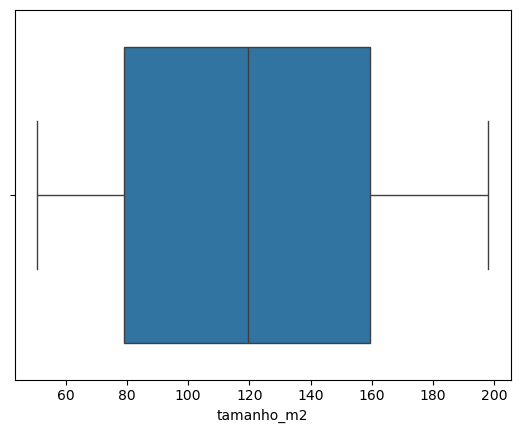

In [15]:
sns.boxplot(data=df_alugel_eda, x='tamanho_m2')

<Axes: xlabel='n_quartos'>

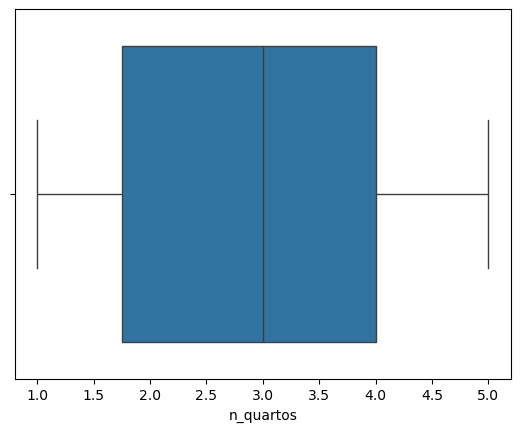

In [16]:
sns.boxplot(data=df_alugel_eda, x='n_quartos')

<Axes: xlabel='valor_aluguel'>

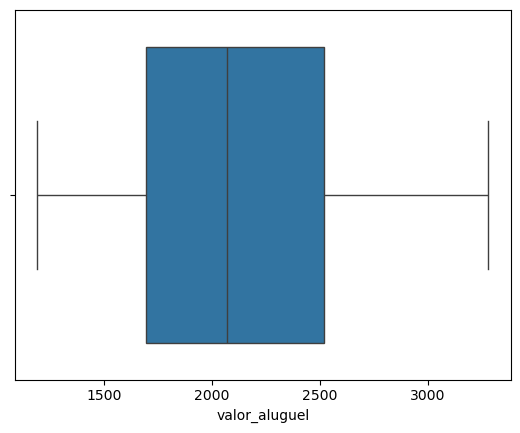

In [17]:
sns.boxplot(data=df_alugel_eda, x='valor_aluguel')

<Axes: xlabel='localizacao_Periferia', ylabel='valor_aluguel'>

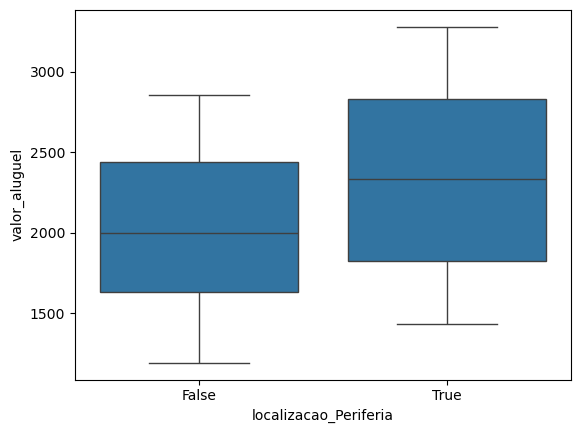

In [18]:
# Cruzamento de variáveis categóricas com nível de colesterol
sns.boxplot(data=df_alugel_eda, x='localizacao_Periferia', y='valor_aluguel')

<Axes: xlabel='localizacao_Subúrbio', ylabel='valor_aluguel'>

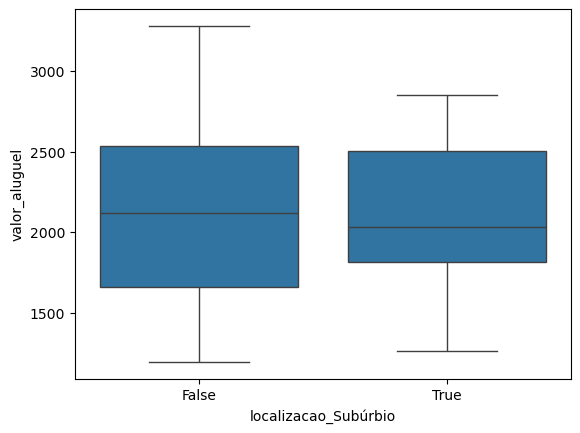

In [19]:
sns.boxplot(data=df_alugel_eda, x='localizacao_Subúrbio', y='valor_aluguel')

<Axes: xlabel='idade_casa', ylabel='valor_aluguel'>

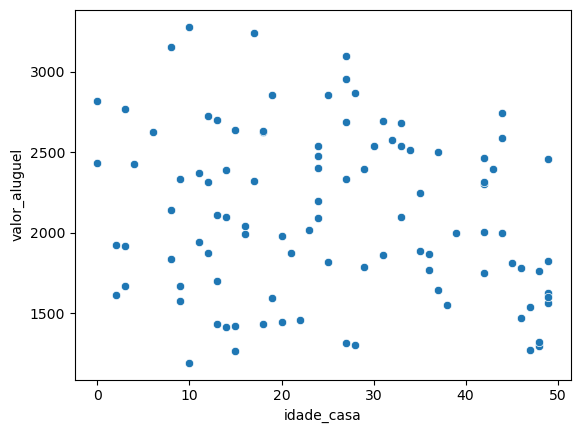

In [20]:
sns.scatterplot(data=df_alugel_eda,x='idade_casa',y='valor_aluguel')

<Axes: xlabel='n_quartos', ylabel='valor_aluguel'>

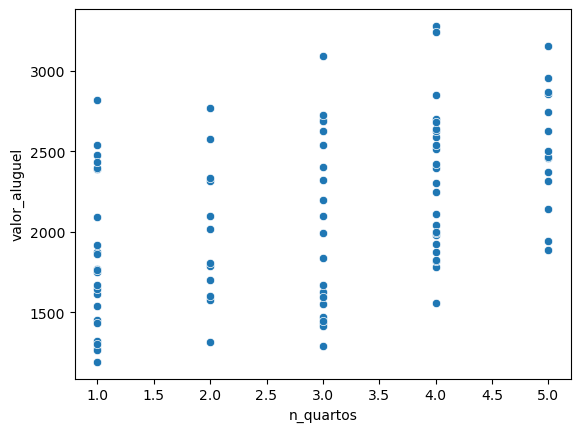

In [21]:
sns.scatterplot(data=df_alugel_eda,x='n_quartos',y='valor_aluguel')

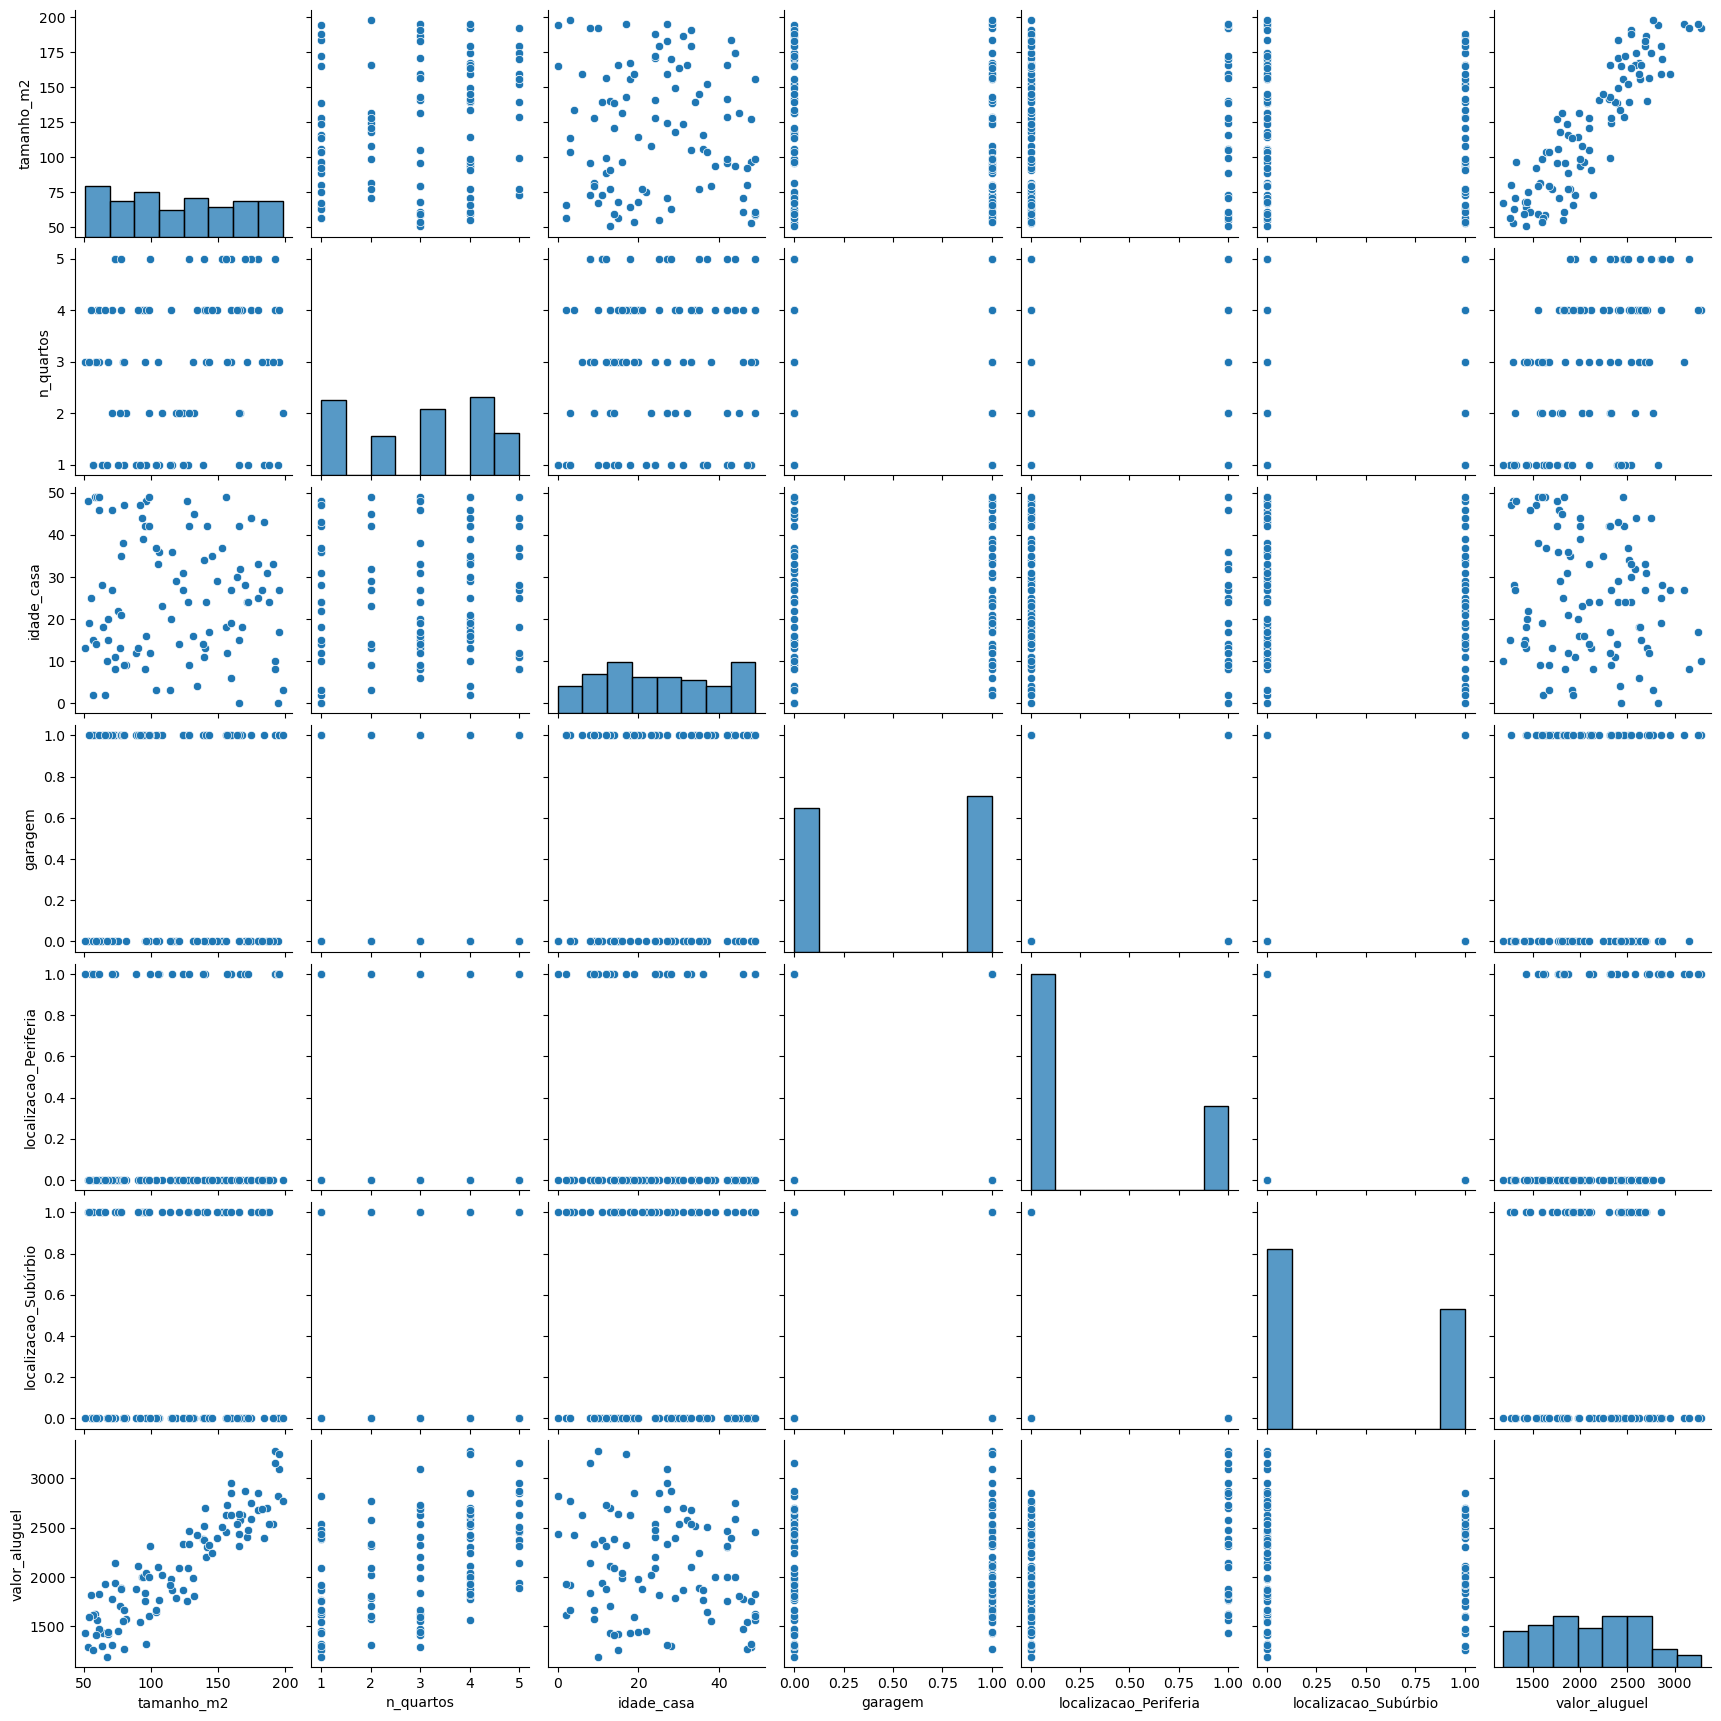

In [22]:
sns.pairplot(df_alugel_eda)

In [23]:
# Converter variaveis categoricas nominais em numericas, usando one-hot Enconder do Pandas
df_alugel_eda = pd.get_dummies(df_alugel_eda,columns=['localizacao_Periferia','localizacao_Subúrbio'],dtype='int64')

In [24]:
df_alugel_eda.head()

,tamanho_m2,n_quartos,idade_casa,garagem,valor_aluguel,localizacao_Periferia_False,localizacao_Periferia_True,localizacao_Subúrbio_False,localizacao_Subúrbio_True
0,106.181018,1,36,0,1767.122088,0,1,1,0
1,192.607146,4,10,1,3278.742397,0,1,1,0
2,159.799091,5,27,1,2953.899737,0,1,1,0
3,139.798773,4,34,1,2514.717108,1,0,0,1
4,73.402796,5,11,0,1942.164396,1,0,0,1


<Axes: >

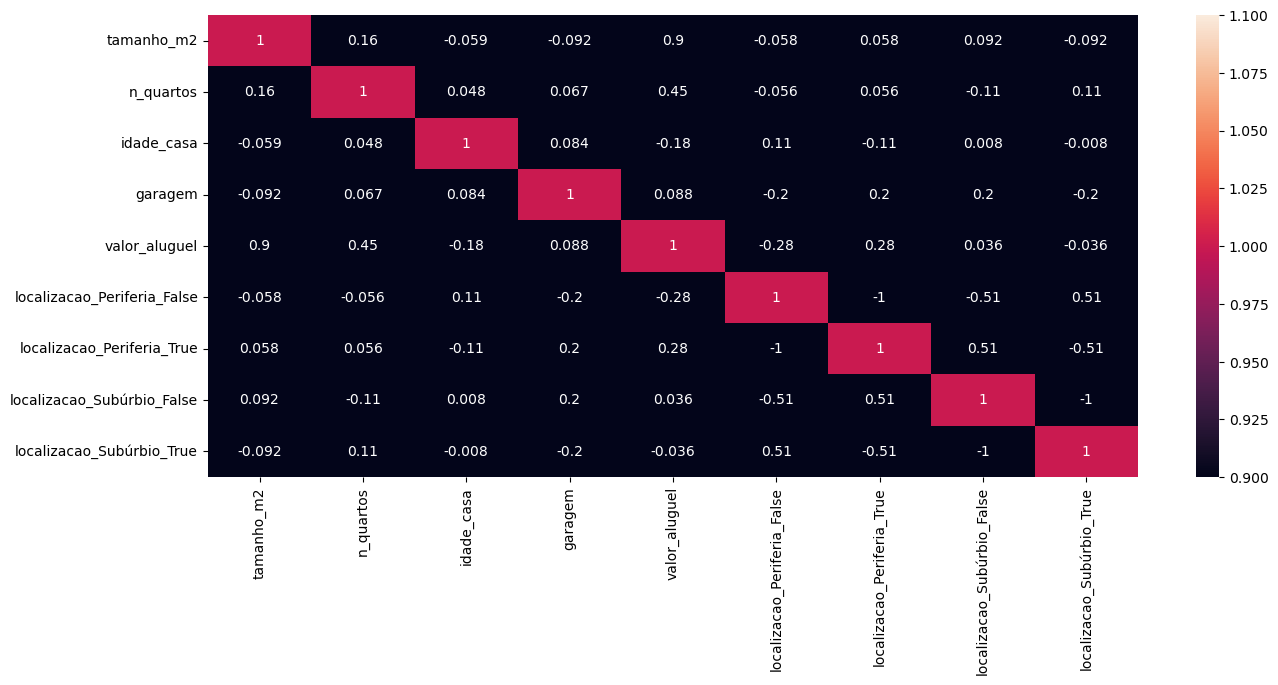

In [25]:
plt.figure(figsize=(15,6))
sns.heatmap(data=df_alugel_eda.corr(),vmin=1,vmax=1, annot=True)

<Axes: >

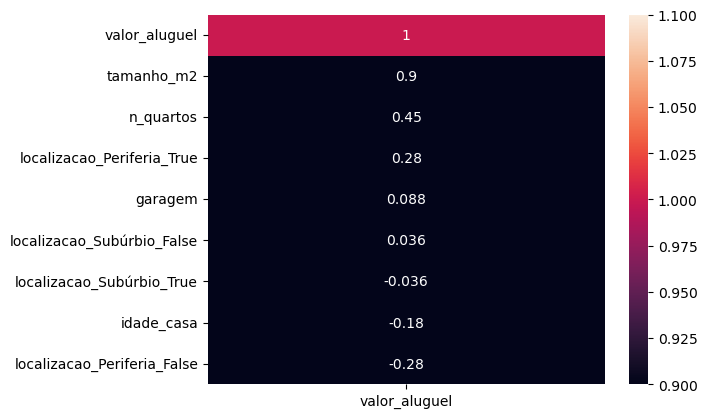

In [26]:
sns.heatmap(df_alugel_eda.corr()[['valor_aluguel']].sort_values(by='valor_aluguel',ascending=False), vmax=1,vmin=1,annot=True)

0.2592431386993388

In [39]:
bins_idade = [0, 19, 29, 39, np.inf]

labels_idade = ['0-19', '20-29', '30-39', '40+']

df_alugel_bucketing['escala_idade'] = pd.cut(x=df_alugel_bucketing['idade_casa'],
                                           bins=bins_idade,
                                           labels=labels_idade,
                                           include_lowest=True)

In [41]:
df_alugel_bucketing.head()

,tamanho_m2,n_quartos,idade_casa,garagem,localizacao_Periferia,localizacao_Subúrbio,valor_aluguel,escala_idade
0,106.181018,1,36.760806,0,True,False,1767.122088,30-39
1,192.607146,4,10.453581,1,True,False,3278.742397,0-19
2,159.799091,5,27.072399,1,True,False,2953.899737,20-29
3,139.798773,4,34.789220,1,False,True,2514.717108,30-39
4,73.402796,5,11.427501,0,False,True,1942.164396,0-19


<Axes: xlabel='escala_idade', ylabel='valor_aluguel'>

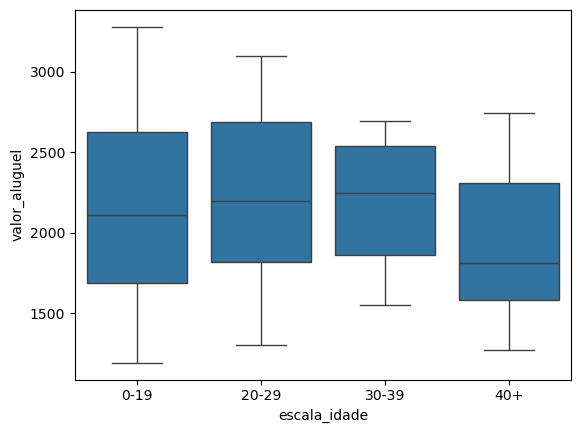

In [42]:
sns.boxplot(data=df_alugel_bucketing, x='escala_idade', y='valor_aluguel')

In [54]:
bins_m2 = [49,69,89,109,129,149,169,np.inf]

labels_m2 = ['49-69','69-89','89-109','109-129','129-149','149-169','169+']

df_alugel_bucketing['escala_m2'] = pd.cut(x=df_alugel_bucketing['tamanho_m2'],
                                          bins=bins_m2,
                                          labels=labels_m2,
                                          include_lowest=True)

In [55]:
df_alugel_bucketing.head()

,tamanho_m2,n_quartos,idade_casa,garagem,localizacao_Periferia,localizacao_Subúrbio,valor_aluguel,escala_idade,escala_m2
0,106.181018,1,36.760806,0,True,False,1767.122088,30-39,89-109
1,192.607146,4,10.453581,1,True,False,3278.742397,0-19,169+
2,159.799091,5,27.072399,1,True,False,2953.899737,20-29,149-169
3,139.798773,4,34.789220,1,False,True,2514.717108,30-39,129-149
4,73.402796,5,11.427501,0,False,True,1942.164396,0-19,69-89


In [52]:
df_alugel_bucketing.drop(columns='escala_m2', axis=1, inplace=True)

<Axes: xlabel='escala_m2', ylabel='valor_aluguel'>

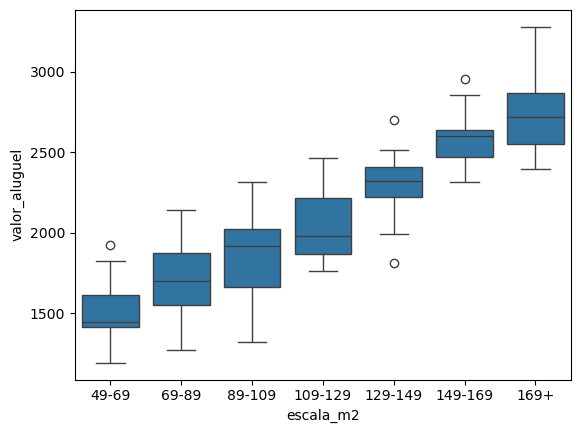

In [56]:
sns.boxplot(data=df_alugel_bucketing, x='escala_m2',y='valor_aluguel')

## Treinar o modelo

In [57]:
X = df_alugel.drop(columns='valor_aluguel',axis=1)
y = df_alugel['valor_aluguel']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [59]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(80, 6)
(20, 6)
(80,)
(20,)


In [61]:
df_alugel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tamanho_m2             100 non-null    float64
 1   n_quartos              100 non-null    int64  
 2   idade_casa             100 non-null    float64
 3   garagem                100 non-null    int64  
 4   localizacao_Periferia  100 non-null    bool   
 5   localizacao_Subúrbio   100 non-null    bool   
 6   valor_aluguel          100 non-null    float64
dtypes: bool(2), float64(3), int64(2)
memory usage: 4.2 KB


In [62]:
colunas_numericas = ['tamanho_m2','n_quartos','idade_casa','garagem']
colunas_categoricas = ['localizacao_Periferia','localizacao_Subúrbio']

In [63]:
transformer_num = Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='median')),
        ('scaler',StandardScaler())
    ]
)

In [68]:
transformer_cat = Pipeline(
    steps=[
        ('oneHot',OneHotEncoder(handle_unknown='ignore'))
    ]
)

In [69]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num',transformer_num,colunas_numericas),
        ('cat',transformer_cat,colunas_categoricas)
    ]
)

In [70]:
model_reg = Pipeline(
    steps=[
        ('preprocessor',preprocessor),
        ('lin_model',LinearRegression())
    ]
)

In [71]:
model_reg.fit(X_train,y_train)

,steps,"[('preprocessor', ...), ('lin_model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


## Análisando Métricas

In [72]:
y_pred = model_reg.predict(X_test)

In [73]:
r2_score(y_test,y_pred)

0.9907337434705847

In [74]:
mean_absolute_error(y_test,y_pred)

38.464806387764554

In [75]:
import numpy as np
np.sqrt(mean_squared_error(y_test, y_pred))

np.float64(47.906663579515914)

In [76]:
# Resíduos

residuos = y_test - y_pred

In [77]:
# Transformar os residuos na escala padrão
# (x - media)/ desvio padrão

from scipy.stats import zscore

residuos_std = zscore(residuos)

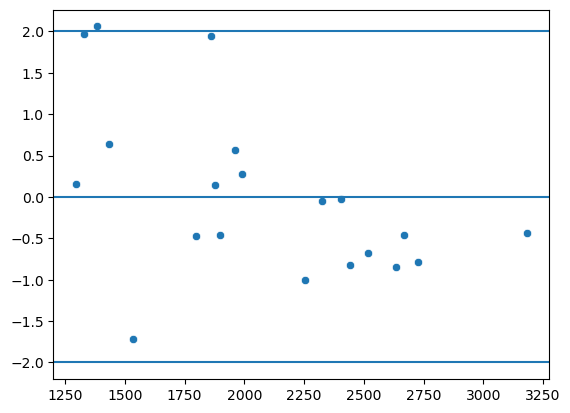

In [79]:
sns.scatterplot(x=y_pred, y=residuos_std)
plt.axhline(y=0)
plt.axhline(y=-2)
plt.axhline(y=2)
plt.show()

### Existe um item fora, mas não é uma quantidade considerável
### Não há uma tendência a ter um formato de cone ou um formato de um funil, os valores parecem estar espalhados em torno da reta

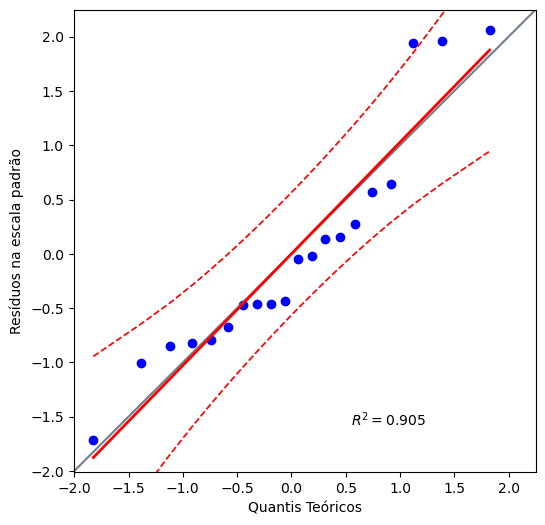

In [82]:
# Vamos checar se os resíduos seguem uma distribuição normal
# QQ Plot
import pingouin as pg
plt.figure(figsize=(14,6))
pg.qqplot(residuos_std,dist='norm',confidence=0.95)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Resíduos na escala padrão')
plt.show()

In [ ]:
# Teste de normalidade de shapiro-wilk, se o p_value for  < 0.05 rejeitamos h0
stat_shapiro, p_value_shapiro = shapiro(residuos)
print("Estatistica do Teste: {} e P-Value: {}".format(stat_shapiro,p_value_shapiro))

Estatistica do Teste: 0.902267007332786 e P-Value: 0.0454876502413335


In [84]:
# Teste de Kolmogorov-Smirnov se o p_value for < 0.05 rejeitamos h0
stat_ks, p_value_ks = kstest(residuos,'norm')
print("Estatistica do Teste: {} e P-Value: {}".format(stat_ks,p_value_ks))

Estatistica do Teste: 0.6011731269621021 e P-Value: 1.9109039191844922e-07


In [85]:
# Teste de lilliefors se o p_value for < 0.05 rejeitamos h0
stat_ll, p_value_ll = lilliefors(residuos,dist='norm',pvalmethod='table')
print("Estatistica do Teste: {} e P-Value: {}".format(stat_ll,p_value_ll))

Estatistica do Teste: 0.16260563880509216 e P-Value: 0.1857830157946856


### 2 Testes indicaram para rejeitar e um indicaram par não rejeitar h0

In [86]:
# Teste de Anderson-Darling
stat_and, critial_and, significance_and = anderson(residuos,dist='norm')

In [87]:
# Retorna um valor para cada nivel de significância que está abaixo 15%,10%...
critial_and

array([0.506, 0.577, 0.692, 0.807, 0.96 ])

In [88]:
significance_and

array([15. , 10. ,  5. ,  2.5,  1. ])

In [89]:
print("Estatistica do Teste: {} e Valor Crítico: {}".format(stat_and,critial_and[2]))

Estatistica do Teste: 0.7943613863473402 e Valor Crítico: 0.692


In [90]:
# O valor é da estatistica do teste é maior do que o valor crítico, eu posso rejeitar h0, Logo os resíduos não seguem uma distribuição normal

In [91]:
# Teste de homocedasticidade de Goldfeld-Quandt
pipe = Pipeline(steps=[('preprocessor',preprocessor)])
X_test_transformed = pipe.fit_transform(X_test)

In [92]:
X_test_transformed

array([[-1.32066976,  0.10804236, -1.11633001, -0.65465367,  1.        ,
         0.        ,  1.        ,  0.        ],
       [ 1.32501976, -1.33252245,  1.15875647,  1.52752523,  1.        ,
         0.        ,  1.        ,  0.        ],
       [ 0.93487475,  0.82832477, -1.074712  , -0.65465367,  1.        ,
         0.        ,  0.        ,  1.        ],
       [ 0.58565972,  0.82832477,  0.0617728 , -0.65465367,  1.        ,
         0.        ,  0.        ,  1.        ],
       [-0.6993356 , -1.33252245, -1.29561188,  1.52752523,  0.        ,
         1.        ,  1.        ,  0.        ],
       [-0.1220792 , -1.33252245,  0.58595201, -0.65465367,  0.        ,
         1.        ,  1.        ,  0.        ],
       [-0.59314549,  0.82832477,  0.84350721,  1.52752523,  1.        ,
         0.        ,  0.        ,  1.        ],
       [ 1.22405166,  0.82832477,  0.38680327, -0.65465367,  1.        ,
         0.        ,  0.        ,  1.        ],
       [-1.45744315,  0.10804236

In [93]:
test_goldfeld = het_goldfeldquandt(residuos, X_test_transformed)
stat_goldfeld = test_goldfeld[0]
p_value_goldfeld = test_goldfeld[1]
print("Estatistica do Teste: {} e P-Value: {}".format(stat_goldfeld,p_value_goldfeld))

Estatistica do Teste: 45.687012652891624 e P-Value: 0.005287424899578041


In [94]:
modelo = model_reg.named_steps['lin_model']
preprocessor = model_reg.named_steps['preprocessor']
intercepto = modelo.intercept_
nomes_features = preprocessor.get_feature_names_out()
coeficientes = modelo.coef_

print(f"Fórmula do Modelo de Regressão Linear\n")
print(f"Intercepto (Valor Base): {intercepto:.2f}\n")
print("Coeficientes por Variável:")

formula_df = pd.Series(coeficientes, index=nomes_features).sort_values(ascending=False)
print(formula_df)


Fórmula do Modelo de Regressão Linear

Intercepto (Valor Base): 2206.80

Coeficientes por Variável:
num__tamanho_m2                     438.545946
cat__localizacao_Periferia_True     147.690831
num__n_quartos                      139.061674
cat__localizacao_Subúrbio_True       88.379022
num__garagem                         73.147699
num__idade_casa                     -63.354382
cat__localizacao_Subúrbio_False     -88.379022
cat__localizacao_Periferia_False   -147.690831
dtype: float64
